In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *
from AC_qubit_func import spectrum_vs_ng
from AC_qubit_func import spectrum_vs_phi0
from AC_qubit_func import spectrum_

import matplotlib as mpl
mpl.rcParams["font.size"] = 12

import scipy.constants as const

In [2]:
flux_quantum=const.physical_constants['mag. flux quantum'][0]
(flux_quantum/(2 * np.pi))**2 / (0.4 * 6.626069570305e-25)

4.0865381086705315e-07

In [3]:
L_nH = 191
EL_GHz = ( flux_quantum / (2 * np.pi))**2 / (L_nH * 1e-9) * 1.509190311677e24
print('{:.2g}GHz'.format(EL_GHz))

0.86GHz


In [4]:
# Parameters as in the PRL paper
# params = {'EJ':6.25,'EC':6.7,'EL':0.4,'ECL':5,'Delta_EJ':0.}  

# params = {'EJ':20*0.1,'EC':20,'EL':0.1,'ECL':20,'Delta_EJ':0.}
# params = {'EJ':20*0.7,'EC':20*1.3,'EL':0.54,'ECL':20*1.3,'Delta_EJ':0.}
params = {'EJ':33,'EC':14,'EL':0.85,'ECL':8,'Delta_EJ':0.}


args = {'Phi_min':-8*pi,'Phi_max':8*pi,'Qdim':7,'gridsize':50}

Q_dim = args['Qdim']
Q_list = np.arange(Q_dim)-3

In [5]:
# fr_GHz = 6.5
Lc_nH = 1.2
L_SI_nH = L_nH*2
L_r_nH = (1.3+3.7)+Lc_nH
C_fF = 105
fr_GHz = 1/2/np.pi/(np.sqrt(L_r_nH * 1e-9 * C_fF * 1e-15))/1e9
print('fr = {:.2f} GHz'.format(fr_GHz))
RQ_Ohm = 6.5e3
Z0 = np.sqrt(L_r_nH * 1e-9/ (C_fF * 1e-15)) 
print('Z0 = {:.2f} Ohm'.format(Z0))
g_GHz = fr_GHz * Lc_nH / (Lc_nH + L_SI_nH) * np.sqrt(RQ_Ohm / (4*np.pi*Z0) )
print('g = {:.2f} GHz'.format(g_GHz))

fr = 6.24 GHz
Z0 = 243.00 Ohm
g = 0.03 GHz


In [6]:
fr = 1/2/np.pi/(np.sqrt(L_r_nH * 1e-9 * C_fF * 1e-15))/1e9
print(fr)

6.23777402183195


In [7]:
E_J, E_C, E_L, E_CL = [params['EJ'],params['EC'],params['EL'],params['ECL']]
Q_dim,gridsize = [7, 100]
phi_min, phi_max= [-5,5]
ng = 0
phi0 = 0
evals, evecs = spectrum_(E_J, E_C, E_L, E_CL, ng, phi0, \
              phi_min,phi_max,\
              Q_dim=Q_dim, Q_offset=3,gridsize=gridsize
              )


Text(0.5,0,'$\\Phi/(2 \\pi \\Phi_0)$')

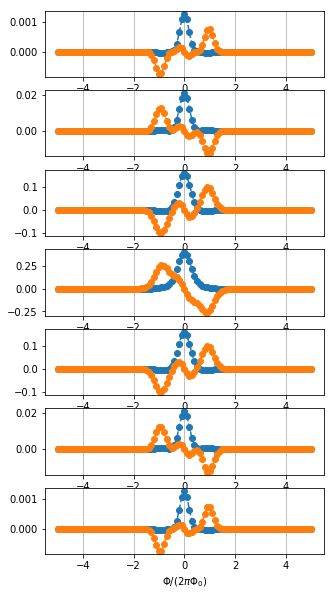

In [8]:
plt.subplots(Q_dim,1,figsize=(5,10))
plt.subplots_adjust(hspace = .2)
phi= np.linspace(phi_min,phi_max,gridsize+1) * 2* np.pi 

for i in np.arange(2):
    y = evecs[i].real
    y = y.reshape(Q_dim,gridsize+1)

    for j in np.arange(Q_dim):
        plt.subplot(Q_dim,1,j+1)
    
#     for i in np.arange(2):
#         y = evecs[i].real
        y = y.reshape(Q_dim,gridsize+1)
        plt.plot(phi/2/np.pi,y[j,:],'o--',label='%d'% i) 
        for vector in y:
            
#     plt.legend()
    plt.grid(axis='x')
plt.xlabel('$\Phi/(2 \pi \Phi_0)$',)

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


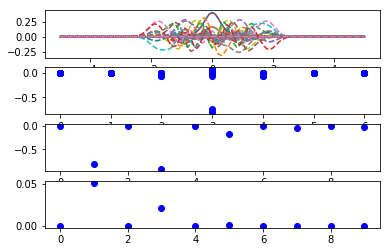

In [9]:
i = 0
psi_i = evecs[i].real
psi_i = psi_i.reshape(Q_dim,gridsize+1)
plt.subplots(4,1)
plt.subplot(4,1,1)
# plot wave functions 
for N in np.arange(Q_dim):
    plt.plot(phi/2/np.pi,psi_i[N,:],'-',label='%d'% i)    
#     plt.legend()
plt.xlabel('$\Phi/(2 \pi \Phi_0)$',)

chi_i = 0
for j in np.arange(10):
    psi_j = evecs[j].real
    psi_j = psi_j.reshape(Q_dim,gridsize+1)
    varphi_ij = 0
    
    for N in np.arange(Q_dim):
        plt.subplot(4,1,1)
        plt.plot(phi/2/np.pi,psi_j[N,:],'--',label='%d'% i)    
        t = np.sum(psi_j[N,:]*psi_i[N,:]*phi)
        varphi_ij += t
        plt.subplot(4,1,2)
        plt.plot(N,t,'o',c='b')
    
    plt.subplot(4,1,3)
    plt.plot(j,varphi_ij,'o',c='b')
      
    t =  varphi_ij**2 * 2*fr / ( np.power(np.abs(evals[j]-evals[i]),2) - fr**2)
    
    chi_i +=t
    
    plt.subplot(4,1,4)
    plt.plot(j,t,'o',c='b')
    
chi_i = g_GHz**2 * chi_i
    

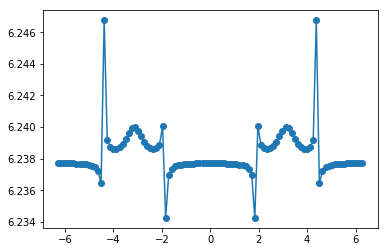

In [13]:
phi= np.linspace(phi_min,phi_max,gridsize+1) * 2* np.pi 

ng = 0
phi0_list = np.linspace(-2*np.pi,2*np.pi,100)
chi_i_array = []
en = [] 
for phi0 in phi0_list:
    evals, evecs = spectrum_(E_J, E_C, E_L, E_CL, ng, phi0, \
                  phi_min,phi_max,\
                  Q_dim=Q_dim, Q_offset=3,gridsize=gridsize
                  )
    
    en.append(evals[0])
    
    i = 0
    psi_i = evecs[i].real
    psi_i = psi_i.reshape(Q_dim,gridsize+1)

    chi_i = 0
    for j in np.arange(10):
        if j == i:
            continue
            
        psi_j = evecs[j].real
        psi_j = psi_j.reshape(Q_dim,gridsize+1)
        varphi_ij = 0

        for N in np.arange(Q_dim):
            t = np.sum(psi_j[N,:]*psi_i[N,:]*phi)
            varphi_ij += t

        t =  varphi_ij**2 * 2*fr / ( np.power(np.abs(evals[j]-evals[i]),2) \
                                    - fr**2)

        chi_i +=t

    chi_i = g_GHz**2 * chi_i
    
    chi_i_array.append(chi_i)
    

chi_i_array = np.array(chi_i_array)
plt.subplots()
plt.plot(phi0_list,-chi_i_array+fr,'o-')

# plt.subplots()
# plt.plot(phi0_list,en)


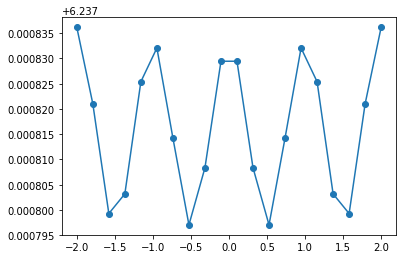

In [12]:
phi= np.linspace(phi_min,phi_max,gridsize+1) * 2* np.pi 

ng_list = np.linspace(-0.5,0.5,20)
phi0 = 0
chi_i_array = []
en = [] 
for ng in ng_list:
    evals, evecs = spectrum_(E_J, E_C, E_L, E_CL, ng, phi0, \
                  phi_min,phi_max,\
                  Q_dim=Q_dim, Q_offset=3,gridsize=gridsize
                  )
    
    en.append(evals[0])
    
    i = 0
    psi_i = evecs[i].real
    psi_i = psi_i.reshape(Q_dim,gridsize+1)

    chi_i = 0
    for j in np.arange(10):
        if j == i:
            continue
            
        psi_j = evecs[j].real
        psi_j = psi_j.reshape(Q_dim,gridsize+1)
        varphi_ij = 0

        for N in np.arange(Q_dim):
            t = np.sum(psi_j[N,:]*psi_i[N,:]*phi)
            varphi_ij += t

        t =  varphi_ij**2 * 2*fr / ( np.power(np.abs(evals[j]-evals[i]),2) \
                                    - fr**2)

        chi_i +=t

    chi_i = g_GHz**2 * chi_i
    
    chi_i_array.append(chi_i)
    

chi_i_array = np.array(chi_i_array)
plt.subplots()
plt.plot(ng_list,chi_i_array+fr,'o-')

# plt.subplots()
# plt.plot(phi0_list,en)
